### IMPORTING DEPENDENCIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

IMPORTING THE DATASET

In [59]:
data = pd.read_excel("tax data.xlsx" )   #dtype = {"ANNUAL TAX": int, "NUMBER OF MONTHS": int}  #skiprows = 1

### DATA PRE-PROCESSING

In [4]:
data.isna().sum()

NATIONALITY            0
DESIGNATION            0
SECTOR                 0
GROSS INCOME           0
ANNUAL TAX             0
NUMBER OF MONTHS    1553
dtype: int64

In [60]:
data["NUMBER OF MONTHS"].fillna(data["NUMBER OF MONTHS"].mean(), inplace = True)

In [6]:
data.dtypes

NATIONALITY          object
DESIGNATION          object
SECTOR               object
GROSS INCOME        float64
ANNUAL TAX          float64
NUMBER OF MONTHS    float64
dtype: object

In [ ]:
#data["NUMBER OF MONTHS"] = pd.to_numeric(data["NUMBER OF MONTHS"], errors = "coerce")
#data["NUMBER OF MONTHS"].fillna(data["NUMBER OF MONTHS"].mean(), inplace = True)
#data["DESIGNATION"].fillna("Staff", inplace = True)
#DATA = data.dropna(axis = 0, how = "any")

### EXPLORATORY ANALYSIS

In [10]:
data.head()

,NATIONALITY,DESIGNATION,SECTOR,GROSS INCOME,ANNUAL TAX,NUMBER OF MONTHS
0,NIGERIAN,ADMIN OFFICER,PHARMACUETICAL,274000.0,2740.00,12.0
1,NIGERIAN,ADMIN OFFICER,PHARMACUETICAL,69600.0,1698.66,2.0
2,NIGERIAN,SECURITY,PHARMACUETICAL,205500.0,2055.00,10.0
3,NIGERIAN,SECURITY,PHARMACUETICAL,250000.0,2500.00,12.0
4,NIGERIAN,PHARMACIST,PHARMACUETICAL,1235000.0,67920.00,12.0


In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

In [7]:
data["SECTOR"].value_counts()

BANKING           15546
MANUFACTURING      4629
TELECOMS           3054
PHARMACUETICAL     2206
OIL AND GAS        1828
Name: SECTOR, dtype: int64

In [8]:
data["NATIONALITY"].value_counts()

NIGERIAN      27137
FOREIGNER       122
 NIGERIAN         4
Name: NATIONALITY, dtype: int64

In [11]:
left = data.groupby("NATIONALITY")

N = left.sum()
N

,GROSS INCOME,ANNUAL TAX,NUMBER OF MONTHS
NATIONALITY,,,
NIGERIAN,2.720000e+02,5.970000e+02,45.000000
FOREIGNER,4.883506e+09,9.012048e+08,1159.000000
NIGERIAN,2.389149e+11,3.700335e+10,281503.660319


A LITTLE BIT OF DATA ENGINEERING

To create a new column to categorize tax payers based on their income.

In [12]:
data['INCOME CATEGORY'] = pd.qcut(data['GROSS INCOME'],7,labels=['LEVEL 1','LEVEL 2', "LEVEL 3",'LEVEL 4', "LEVEL 5", "LEVEL 6", "LEVEL 7"])

In [13]:
data.head()

,NATIONALITY,DESIGNATION,SECTOR,GROSS INCOME,ANNUAL TAX,NUMBER OF MONTHS,INCOME CATEGORY
0,NIGERIAN,ADMIN OFFICER,PHARMACUETICAL,274000.0,2740.00,12.0,LEVEL 1
1,NIGERIAN,ADMIN OFFICER,PHARMACUETICAL,69600.0,1698.66,2.0,LEVEL 1
2,NIGERIAN,SECURITY,PHARMACUETICAL,205500.0,2055.00,10.0,LEVEL 1
3,NIGERIAN,SECURITY,PHARMACUETICAL,250000.0,2500.00,12.0,LEVEL 1
4,NIGERIAN,PHARMACIST,PHARMACUETICAL,1235000.0,67920.00,12.0,LEVEL 2


DATA VISUALIZATION

In [ ]:
#SHOWING THE STAFF STRENGTH OF EACH SECTOR

plt.title("Showing the staff strength of the 5 sectors")
sns.set(style="darkgrid")
sns.countplot(x = data["SECTOR"])

In [ ]:
#SHOWING THE NUMBER OF EMPLOYEES IN EACH INCOME LEVEL

plt.title("NUMBER OF EMPLOYEES IN EACH INCOME LEVEL")
sns.set(style="darkgrid")
sns.countplot(x = data["INCOME CATEGORY"].head(500))

In [ ]:
#SHOWING THE INCOME MARGIN OF THE DIFFERENT LEVELS OF INCOME EARNERS

sns.barplot(x= 'INCOME CATEGORY', y= 'GROSS INCOME', data = data)

In [ ]:
#SHOWING HOW MUCH TAX EACH SECTOR GENERATES

sns.barplot(x= 'SECTOR', y= 'ANNUAL TAX', data = data)

In [ ]:
plt.title("Comparing the number of NIGERIANS vs FOREIGNERS")
sns.set(style="darkgrid")
sns.countplot(x = data["NATIONALITY"])

In [ ]:
#COMPARING THE CUMMULATIVE GROSS INCOME OF NIGERIANS VS FOREIGNERS

sns.barplot(x= 'NATIONALITY', y= 'GROSS INCOME', data = data)

In [ ]:
#plt.title("TAX GENERATED BY EACH SECTOR")
#sns.set(style="darkgrid")
#sns.countplot(x = data["ANNUAL TAX"])

In [ ]:
#plt.bar(left.index.values, left["ANNUAL TAX"])
#plt.ylabel("AMOUNT GENERATED")
#plt.show()

In [ ]:
DATA = data.drop("DESIGNATION", axis = 1)
DATA = DATA.drop("NUMBER OF MONTHS", axis = 1)

In [20]:
tax = pd.get_dummies(data)
#sns.pairplot(DATA)

### PROBLEM STATEMENT

Predicting the annual tax of gainfully employed citizens of Nigeria using their gross income. To enable the government better plan the country's budget.

In [61]:
#Getting our train, validation and test data

X = data[["GROSS INCOME"]]
Y = data[["ANNUAL TAX"]]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

### MODEL TRAINING

We use the train set to train the model and use the validation set to validate and thereafter test with the test set.

1) LINEAR REGRESSION MODEL.

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
regressor.score(X_train, Y_train)

0.9875992143180498

In [17]:
print(regressor.intercept_)

[-194939.14314032]


In [18]:
regressor.coef_

array([[0.17776486]])

In [35]:
#To check corelation between variables

cor = data.corr()

print(cor)

                  GROSS INCOME  ANNUAL TAX  NUMBER OF MONTHS
GROSS INCOME          1.000000    0.993850          0.155965
ANNUAL TAX            0.993850    1.000000          0.137992
NUMBER OF MONTHS      0.155965    0.137992          1.000000


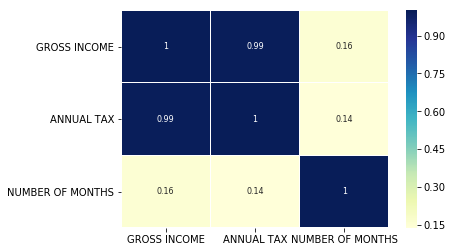

In [37]:
sns.heatmap(cor,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

### MODEL VALIDATION

In [24]:
Y_val_pred = regressor.predict(X_val)

In [41]:
df = Y_val
val = df

val.head()

,ANNUAL TAX
23419,4.153474e+04
23502,2.000473e+07
20521,1.885916e+06
22351,1.176494e+06
13788,2.004528e+04


### MODEL TESTING

In [63]:
Y_test_pred = regressor.predict(X_test)

In [64]:
dn = Y_test
A = dn
result = A

result.head()

,ANNUAL TAX
15245,1.284772e+06
21122,6.465618e+05
11605,1.752327e+05
5804,3.009343e+05
26718,4.750249e+05


In [72]:
result["ANNUAL TAX TEST_PRED"] = Y_test_pred
result.head()

C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ANNUAL TAX,ANNUAL TAX TEST_PRED
15245,1.284772e+06,1.277321e+06
21122,6.465618e+05,7.367901e+05
11605,1.752327e+05,1.703677e+05
5804,3.009343e+05,1.812241e+05
26718,4.750249e+05,5.400591e+05


### ERROR VISUALIZATION FOR LINEAR REGRESSION

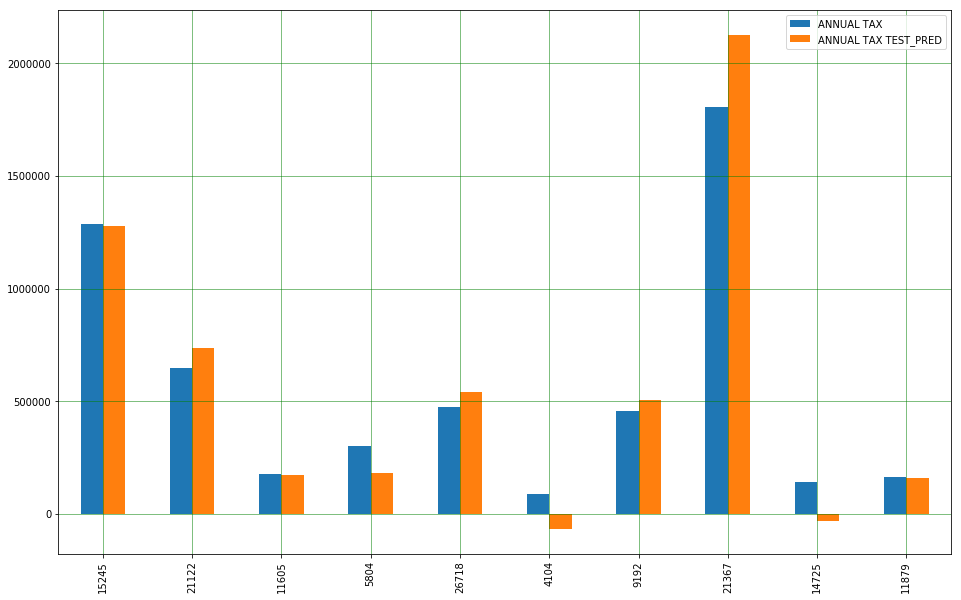

In [44]:
#PLOTTING A BAR CHART OF THE TRUE ANNUAL TAX AGAINST THE PREDICTED ANNUAL TAX

result[["ANNUAL TAX", "ANNUAL TAX TEST_PRED"]].head(10).plot(kind = "bar", figsize = (16, 10))
plt.grid(which = "major", linestyle = "-", linewidth = "0.5", color = "green")
plt.grid(which = "minor", linestyle = ":", linewidth = "0.5", color = "black")
plt.show()

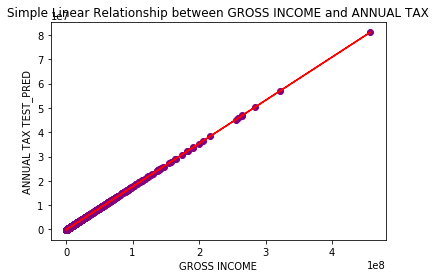

In [45]:
#PLOTTING A SCATTER/PLOT OF THE GROSS INCOME AGAINST THE PREDICTED ANNUAL TAX

plt.scatter(X_test, result["ANNUAL TAX TEST_PRED"], color = "purple")

plt.plot(X_test, regressor.predict(X_test), color = "red")

plt.title("Simple Linear Relationship between GROSS INCOME and ANNUAL TAX")
plt.xlabel("GROSS INCOME")
plt.ylabel("ANNUAL TAX TEST_PRED")
plt.show()

### EVALUATION METRICS FOR REGRESSION MODEL 

#### CHECKING FOR: ERROR, COST FUNCTION, MEAN ABSOLUTE ERROR (MAE), MEAN SQUARED ERROR (MSE) AND ROOT MEAN SQUARED ERROR (RMSE) USING OUR TEST DATA

In [79]:
n = len(result)

result["LR ERROR"] = result["ANNUAL TAX"].subtract(result["ANNUAL TAX TEST_PRED"])
print(result.iloc[ : 11, : ])

Cost_Function = abs(result["ERROR"]).sum()
Mean_Absolute_Error = Cost_Function / n

print("\nTHE COST FUNCTION IS = ", Cost_Function)
print("THE MEAN ABSOLUTE ERROR IS = ", Mean_Absolute_Error)

         ANNUAL TAX  ANNUAL TAX TEST_PRED          ERROR     Y_RF_PRED  \
15245  1.284772e+06          1.277321e+06    7451.159187  1.284772e+06   
21122  6.465618e+05          7.367901e+05  -90228.311919  6.960452e+05   
11605  1.752327e+05          1.703677e+05    4865.016804  1.722209e+05   
5804   3.009343e+05          1.812241e+05  119710.123864  2.975266e+05   
26718  4.750249e+05          5.400591e+05  -65034.266158  4.996802e+05   
4104   8.766278e+04         -6.845608e+04  156118.865417  6.832558e+04   
9192   4.561910e+05          5.030635e+05  -46872.473631  4.561910e+05   
21367  1.804398e+06          2.125148e+06 -320750.310093  1.958119e+06   
14725  1.423350e+05         -3.183295e+04  174167.947219  1.423350e+05   
11879  1.632661e+05          1.577997e+05    5466.395665  1.631289e+05   
19010  2.968165e+06          3.053474e+06  -85309.149264  2.932586e+06   

           RF ERROR       LR ERROR  
15245  0.000000e+00    7451.159187  
21122 -4.948336e+04  -90228.311919  


C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
#Y_test.drop("ANNUAL TAX TEST_PRED", axis = 1, inplace = True)
#Y_test.drop("ERROR", axis = 1, inplace = True)
Y_test.head()

,ANNUAL TAX,ANNUAL TAX TEST_PRED,ERROR
15245,1.284772e+06,1.277321e+06,7451.159187
21122,6.465618e+05,7.367901e+05,-90228.311919
11605,1.752327e+05,1.703677e+05,4865.016804
5804,3.009343e+05,1.812241e+05,119710.123864
26718,4.750249e+05,5.400591e+05,-65034.266158


In [66]:
#USING SKLEARN REGRESSION METRICS

from sklearn import metrics

print('MEAN ABSOLUTE ERROR:', metrics.mean_absolute_error(Y_test, Y_test_pred))  
print('MEAN SQUARED ERROR:', metrics.mean_squared_error(Y_test, Y_test_pred))  
print('ROOT MEAN SQUARED ERROR:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

MEAN ABSOLUTE ERROR: 132443.2746050846
MEAN SQUARED ERROR: 145737153416.07495
ROOT MEAN SQUARED ERROR: 381755.3580712063


#### CONCLUSION

The disparity between the Y_test(true value) and Y_test_Pred(predicted value) can be ignored.

### 2) USING RANDOM FOREST MODEL

In [67]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, Y_train)

C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [68]:
Y_rf_pred = rf.predict(X_test)

In [69]:
#from sklearn import metrics

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV

In [74]:

result["Y_RF_PRED"] = Y_rf_pred

C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
result.head()

,ANNUAL TAX,ANNUAL TAX TEST_PRED,ERROR,Y_RF_PRED
15245,1.284772e+06,1.277321e+06,7451.159187,1.284772e+06
21122,6.465618e+05,7.367901e+05,-90228.311919,6.960452e+05
11605,1.752327e+05,1.703677e+05,4865.016804,1.722209e+05
5804,3.009343e+05,1.812241e+05,119710.123864,2.975266e+05
26718,4.750249e+05,5.400591e+05,-65034.266158,4.996802e+05


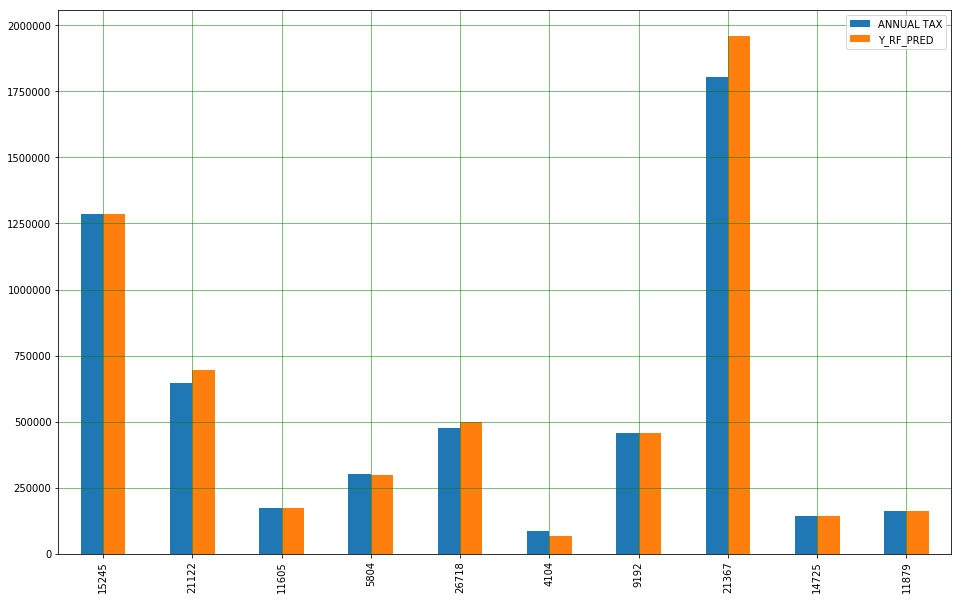

In [76]:
#SHOWING THE COMPARISON OF ANNUAL TAX AND RANDOM FOREST PREDICTED ANNUAL TAX

result[["ANNUAL TAX", "Y_RF_PRED"]].head(10).plot(kind = "bar", figsize = (16, 10))
plt.grid(which = "major", linestyle = "-", linewidth = "0.5", color = "green")
plt.grid(which = "minor", linestyle = ":", linewidth = "0.5", color = "black")
plt.show()

In [77]:
result["RF ERROR"] = result["ANNUAL TAX"].subtract(result["Y_RF_PRED"])

C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
result.head()

,ANNUAL TAX,ANNUAL TAX TEST_PRED,ERROR,Y_RF_PRED,RF ERROR
15245,1.284772e+06,1.277321e+06,7451.159187,1.284772e+06,0.000000
21122,6.465618e+05,7.367901e+05,-90228.311919,6.960452e+05,-49483.359702
11605,1.752327e+05,1.703677e+05,4865.016804,1.722209e+05,3011.750424
5804,3.009343e+05,1.812241e+05,119710.123864,2.975266e+05,3407.667358
26718,4.750249e+05,5.400591e+05,-65034.266158,4.996802e+05,-24655.307078


In [ ]:
Y_test.head()

In [ ]:
Y_test.drop("Y_RF_PRED", axis = 1, inplace = True)
Y_test.drop("ERROR", axis = 1, inplace = True)

In [71]:
print('MEAN ABSOLUTE ERROR:', metrics.mean_absolute_error(Y_test, Y_rf_pred))  
print('MEAN SQUARED ERROR:', metrics.mean_squared_error(Y_test, Y_rf_pred))  
print('ROOT MEAN SQUARED ERROR:', np.sqrt(metrics.mean_squared_error(Y_test, Y_rf_pred)))

MEAN ABSOLUTE ERROR: 105153.4599435009
MEAN SQUARED ERROR: 209963835106.9254
ROOT MEAN SQUARED ERROR: 458218.10866324935


In [81]:
#CHECKING THE MEAN ABSOLUTE PERCENTAGE BETWEEN ANNUAL TAX AND Y_RF_PRED

result["MAPE"] = 100 * (result["RF ERROR"]/result["ANNUAL TAX"])


C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
result.head()

,ANNUAL TAX,ANNUAL TAX TEST_PRED,ERROR,Y_RF_PRED,RF ERROR,LR ERROR,MAPE,ACCURACY
15245,1.284772e+06,1.277321e+06,7451.159187,1.284772e+06,0.000000,7451.159187,0.000000,-inf
21122,6.465618e+05,7.367901e+05,-90228.311919,6.960452e+05,-49483.359702,-90228.311919,-7.653307,-inf
11605,1.752327e+05,1.703677e+05,4865.016804,1.722209e+05,3011.750424,4865.016804,1.718715,-inf
5804,3.009343e+05,1.812241e+05,119710.123864,2.975266e+05,3407.667358,119710.123864,1.132363,-inf
26718,4.750249e+05,5.400591e+05,-65034.266158,4.996802e+05,-24655.307078,-65034.266158,-5.190319,-inf


In [82]:
result["ACCURACY"] = 100 * result["MAPE"].mean()


C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
result.head()

,ANNUAL TAX,ANNUAL TAX TEST_PRED,ERROR,Y_RF_PRED,RF ERROR,LR ERROR,MAPE,ACCURACY
15245,1.284772e+06,1.277321e+06,7451.159187,1.284772e+06,0.000000,7451.159187,0.000000,-inf
21122,6.465618e+05,7.367901e+05,-90228.311919,6.960452e+05,-49483.359702,-90228.311919,-7.653307,-inf
11605,1.752327e+05,1.703677e+05,4865.016804,1.722209e+05,3011.750424,4865.016804,1.718715,-inf
5804,3.009343e+05,1.812241e+05,119710.123864,2.975266e+05,3407.667358,119710.123864,1.132363,-inf
26718,4.750249e+05,5.400591e+05,-65034.266158,4.996802e+05,-24655.307078,-65034.266158,-5.190319,-inf


CONCLUSION

Random Forest Regression performed better than Linear Regression.